<a href="https://colab.research.google.com/github/ArslanShafique1998/Fire_Detection_classifier/blob/main/Fire_Detection_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip uninstall tensorflow

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0


In [ ]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 28kB/s 
     |████████████████████████████████| 3.9MB 53.1MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 450kB 48.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=cb73dd0027c31335408cd0554bd7e9a5ec7821599587a57e11a68a7530b40e19
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
print(os.name)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
2.1.0
posix


In [ ]:
train_dir= '/content/drive/My Drive/Filter_Data - 2/train'
validation_dir= '/content/drive/My Drive/Filter_Data - 2/validation'
print('Path of data is added...')

Path of data is added...


In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=100,
    class_mode='categorical'
)
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 6016 images belonging to 3 classes.
Found 1512 images belonging to 3 classes.


In [ ]:
model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(4096,activation='relu'),
tf.keras.layers.Dense(1024,activation='relu'),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(64,activation='relu'),
tf.keras.layers.Dense(64,activation='relu'),
tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy']
)

In [ ]:
cnnm = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose = 1,
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 76 steps
Epoch 1/50
51/61 [========================>.....] - ETA: 7:06 - loss: 0.9765 - accuracy: 0.4958

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


61/61 [==============================] - 3243s 53s/step - loss: 0.9539 - accuracy: 0.5160 - val_loss: 0.7977 - val_accuracy: 0.6878
Epoch 2/50
61/61 [==============================] - 136s 2s/step - loss: 0.7530 - accuracy: 0.7091 - val_loss: 0.5757 - val_accuracy: 0.7500
Epoch 3/50
61/61 [==============================] - 136s 2s/step - loss: 0.6329 - accuracy: 0.7532 - val_loss: 0.5822 - val_accuracy: 0.7877
Epoch 4/50
61/61 [==============================] - 136s 2s/step - loss: 0.5496 - accuracy: 0.7934 - val_loss: 0.4402 - val_accuracy: 0.8313
Epoch 5/50
61/61 [==============================] - 136s 2s/step - loss: 0.5085 - accuracy: 0.8143 - val_loss: 0.3721 - val_accuracy: 0.8624
Epoch 6/50
61/61 [==============================] - 136s 2s/step - loss: 0.4812 - accuracy: 0.8326 - val_loss: 0.4108 - val_accuracy: 0.8604
Epoch 7/50
61/61 [==============================] - 136s 2s/step - loss: 0.5108 - accuracy: 0.8057 - val_loss: 0.3514 - val_accuracy: 0.8611
Epoch 8/50
61/61 [====

Text(0.5, 1.0, 'Graph to measure training and validation data loss')

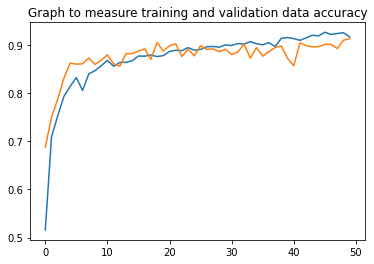

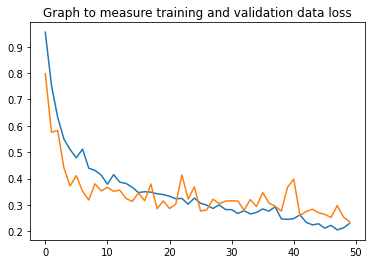

In [ ]:
import matplotlib.pyplot as plt
acc     = cnnm.history['accuracy']
val_acc = cnnm.history['val_accuracy']
loss    = cnnm.history['loss']
val_loss= cnnm.history['val_loss']
epochs  = range(len(acc))
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('Graph to measure training and validation data accuracy')
plt.figure()
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Graph to measure training and validation data loss')

Saving Fire (1).jpg to Fire (1) (3).jpg
Saving Fire (3).jpg to Fire (3) (3).jpg
Saving Fire (6).jpg to Fire (6) (3).jpg
Saving Fire (10).png to Fire (10) (3).png
Saving Fire (1057).jpg to Fire (1057) (3).jpg
Saving Non-Fire (24).jpg to Non-Fire (24) (3).jpg
Saving Non-Fire (25).jpg to Non-Fire (25) (3).jpg
Saving Non-Fire (44).jpg to Non-Fire (44) (3).jpg
Saving NonFire (687).jpg to NonFire (687).jpg
Saving NonFire (720).jpg to NonFire (720).jpg
Saving NonFire (1227).jpg to NonFire (1227) (3).jpg
Saving NonFire (1643).jpg to NonFire (1643) (1).jpg
Saving Sun (272).jpg to Sun (272) (3).jpg


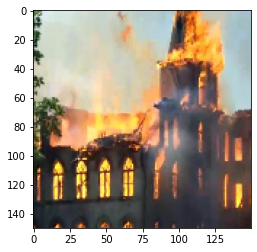

Fire (1).jpg
It is Fire


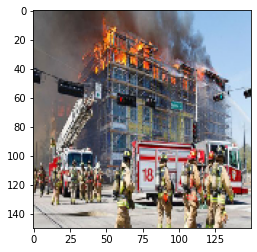

Fire (3).jpg
It is Fire


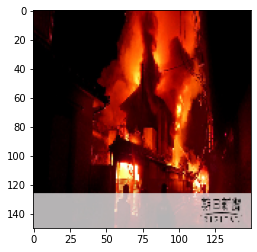

Fire (6).jpg
It is Fire


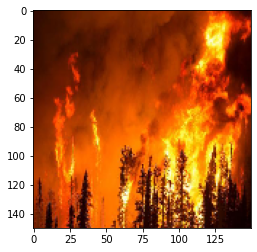

Fire (10).png
It is Fire


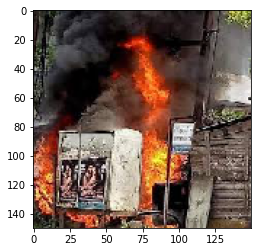

Fire (1057).jpg
It is Fire


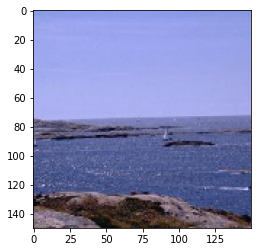

Non-Fire (24).jpg
It is Non-Fire


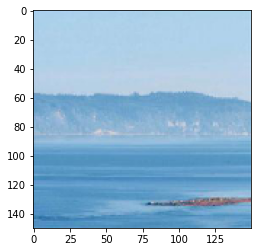

Non-Fire (25).jpg
It is Non-Fire


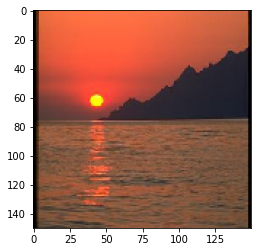

Non-Fire (44).jpg
It is Fire


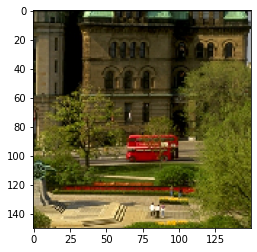

NonFire (687).jpg
It is Fire


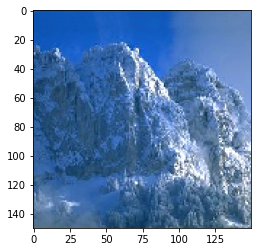

NonFire (720).jpg
It is Non-Fire


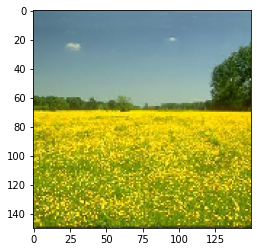

NonFire (1227).jpg
It is Non-Fire


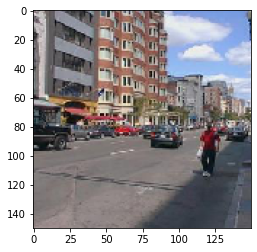

NonFire (1643).jpg
It is Fire


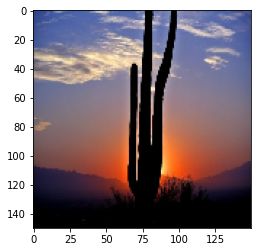

Sun (272).jpg
It is Non-Fire


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image 

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  plt.imshow(img)
  plt.show()
  print(fn)
  if classes[0][0]>0.7:
    print('It is Fire')
  elif classes[0][1]>0.7:
    print('It is Non-Fire')
  else:
    print('It is Smoke')

In [ ]:
model.save("/content/drive/My Drive/2017-EE-118.h5")
print("CNN Fire Detection Model is saaved")

CNN Fire Detection Model is saaved
